# Running and Inspecting Experiments
This notebook was used to run experiments by manually inspecting and changing different ideas and configuration, to fast compare results, before proceeding with the executing of `GridSearch` analysis for hyperparameters.
***

# Installing Packages and Libraries

In [1]:
# Uncomment to upgrade packages
#!pip3 install pandas --user --upgrade --quiet
#!pip3 install scipy --user --upgrade --quiet
#!pip3 install numpy --user --upgrade --quiet
#!pip3 install statsmodels --user --upgrade --quiet
#!pip3 install seaborn --user --upgrade --quiet

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# extra imports
from pandas import read_csv
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import make_scorer
from sklearn import svm

In [5]:
np.random.seed(666)

***
# SECTION 1: Reading the Dataset `bank_marketing_new.csv`

In this first part we are going to load the dataset and get a first overview of the available data.

In [6]:
bank_marketing = read_csv("./bank_marketing_new.csv", header=0, delimiter=',')
bank_marketing.head(20)

age   marital  education default  balance housing loan    contact  day  \
0    28    single          2      no     2528     yes   no   cellular   18   
1    35    single          3      no       51      no   no   cellular   18   
2    48    single          2      no      469      no  yes   cellular    9   
3    51   married          3      no     1315      no   no  telephone    5   
4    36    single          3      no      688      no   no   cellular    2   
5    41   married          3      no       23      no   no   cellular   22   
6    30    single          2      no      248     yes   no   cellular   13   
7    32  divorced          2      no        8     yes   no   cellular   16   
8    41   married          1      no      574     yes   no    Unknown   14   
9    47   married          1      no     1056      no   no  telephone   29   
10   34   married          1      no       12      no   no  telephone   21   
11   39   married          2      no     2040     yes   no   cellular   12   
12   57   married          3      no      729      no   no   cellular   18   
13   48   married          2      no      264      no   no   cellular    6   
14   27    single          3      no      151     yes   no   cellular   16   
15   35   married          3     yes      -10     yes   no   cellular   15   
16   55   married          2      no       76      no   no   cellular    5   
17   29   married          2      no     2870     yes   no   cellular   16   
18   53   married          1      no       49      no   no    Unknown   28   
19   38   married          3      no     1209      no   no   cellular   31   

   month  campaign  previous    y       job      job2  log_campaign  \
0    may         8         0   no    others    others      2.197225   
1    aug         5         0   no  business  business      1.791759   
2    jul         1         0   no    others    others      0.693147   
3    jun         2         0   no    others    others      1.098612   
4    jun         1         1   no  business  business      0.693147   
5    aug         2         0   no  business  business      1.098612   
6    may         1         0   no    others    others      0.693147   
7    jul         1         0   no    others    others      0.693147   
8    may         2         0   no    others    others      1.098612   
9    aug         2         0   no    others    others      1.098612   
10   nov         3         0   no    others    others      1.386294   
11   may         6         0   no    others    others      1.945910   
12   nov         1         0   no  business  business      0.693147   
13   feb         2         0   no    others    others      1.098612   
14   jul         1         0  yes  business  business      0.693147   
15   may         2         1   no  business  business      1.098612   
16   aug         1         0   no    others    others      0.693147   
17   jul         1         0  yes    others    others      0.693147   
18   may         1         0   no    others    others      0.693147   
19   jul         5         0   no  business  business      1.791759   

    log_previous  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.693147  
5       0.000000  
6       0.000000  
7       0.000000  
8       0.000000  
9       0.000000  
10      0.000000  
11      0.000000  
12      0.000000  
13      0.000000  
14      0.000000  
15      0.693147  
16      0.000000  
17      0.000000  
18      0.000000  
19      0.000000

In [ ]:
bank_marketing.drop(columns=['job2', 'log_campaign', 'log_previous'], inplace=True)
# bank_marketing.drop(columns=['job2', 'log_campaign', 'log_previous'], inplace=True)
# bank_marketing.drop(columns=['job', 'log_campaign', 'log_previous'], inplace=True)
# bank_marketing.drop(columns=['job2', 'campaign', 'log_previous'], inplace=True)
# bank_marketing.drop(columns=['job2', 'campaign', 'previous'], inplace=True)
# bank_marketing.drop(columns=['job', 'campaign', 'previous'], inplace=True)
# bank_marketing.drop(columns=['job', 'campaign', 'log_previous'], inplace=True)
# bank_marketing.drop(columns=['job', 'log_campaign', 'previous'], inplace=True)

In [8]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43611 entries, 0 to 43610
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43611 non-null  int64 
 1   marital    43611 non-null  object
 2   education  43611 non-null  int64 
 3   default    43611 non-null  object
 4   balance    43611 non-null  int64 
 5   housing    43611 non-null  object
 6   loan       43611 non-null  object
 7   contact    43611 non-null  object
 8   day        43611 non-null  int64 
 9   month      43611 non-null  object
 10  campaign   43611 non-null  int64 
 11  previous   43611 non-null  int64 
 12  y          43611 non-null  object
 13  job        43611 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.7+ MB


In [9]:
bank_marketing.describe(include='all')

age  marital     education default       balance housing  \
count   43611.000000    43611  43611.000000   43611  43611.000000   43611   
unique           NaN        3           NaN       2           NaN       2   
top              NaN  married           NaN      no           NaN     yes   
freq             NaN    26230           NaN   42837           NaN   24288   
mean       40.943134      NaN      2.147371     NaN   1351.438697     NaN   
std        10.645034      NaN      0.664455     NaN   2828.449413     NaN   
min        18.000000      NaN      1.000000     NaN  -8019.000000     NaN   
25%        33.000000      NaN      2.000000     NaN     75.000000     NaN   
50%        39.000000      NaN      2.000000     NaN    453.000000     NaN   
75%        48.000000      NaN      3.000000     NaN   1433.000000     NaN   
max        95.000000      NaN      3.000000     NaN  58544.000000     NaN   

         loan   contact           day  month      campaign      previous  \
count   43611     43611  43611.000000  43611  43611.000000  43611.000000   
unique      2         3           NaN     12           NaN           NaN   
top        no  cellular           NaN    may           NaN           NaN   
freq    36667     28344           NaN  13481           NaN           NaN   
mean      NaN       NaN     15.624086    NaN      2.333586      0.528857   
std       NaN       NaN      8.268368    NaN      1.672847      1.499892   
min       NaN       NaN      1.000000    NaN      1.000000      0.000000   
25%       NaN       NaN      8.000000    NaN      1.000000      0.000000   
50%       NaN       NaN     16.000000    NaN      2.000000      0.000000   
75%       NaN       NaN     21.000000    NaN      3.000000      0.000000   
max       NaN       NaN     31.000000    NaN      9.000000     14.000000   

            y     job  
count   43611   43611  
unique      2       2  
top        no  others  
freq    38400   27995  
mean      NaN     NaN  
std       NaN     NaN  
min       NaN     NaN  
25%       NaN     NaN  
50%       NaN     NaN  
75%       NaN     NaN  
max       NaN     NaN

***
# SECTION 2: Preprocessing of Categorical Variables

In [10]:
#Boolean yes,no to 1,0
yes_no_mapping = {'yes':1, 'no': 0}
bank_marketing['default'] = bank_marketing['default'].map(yes_no_mapping)
bank_marketing['housing'] = bank_marketing['housing'].map(yes_no_mapping)
bank_marketing['loan'] = bank_marketing['loan'].map(yes_no_mapping)
bank_marketing['y'] = bank_marketing['y'].map(yes_no_mapping)

yes_no_mapping = {'business':1, 'others': 0}
bank_marketing['job'] = bank_marketing['job'].map(yes_no_mapping)

# job2_mapping = {'business':0, 'student': 1, 'retired': 2}
# bank_marketing['job2_mapping'] = bank_marketing['job2_mapping'].map(job2_mapping)

In [11]:
bank_marketing.head(10)

age   marital  education  default  balance  housing  loan    contact  day  \
0   28    single          2        0     2528        1     0   cellular   18   
1   35    single          3        0       51        0     0   cellular   18   
2   48    single          2        0      469        0     1   cellular    9   
3   51   married          3        0     1315        0     0  telephone    5   
4   36    single          3        0      688        0     0   cellular    2   
5   41   married          3        0       23        0     0   cellular   22   
6   30    single          2        0      248        1     0   cellular   13   
7   32  divorced          2        0        8        1     0   cellular   16   
8   41   married          1        0      574        1     0    Unknown   14   
9   47   married          1        0     1056        0     0  telephone   29   

  month  campaign  previous  y  job  
0   may         8         0  0    0  
1   aug         5         0  0    1  
2   jul         1         0  0    0  
3   jun         2         0  0    0  
4   jun         1         1  0    1  
5   aug         2         0  0    1  
6   may         1         0  0    0  
7   jul         1         0  0    0  
8   may         2         0  0    0  
9   aug         2         0  0    0

In [12]:
#One_hot_encoding multicategorical
X = bank_marketing
categorical_columns =X.dtypes[X.dtypes == 'object'].index.values
for column in categorical_columns:
    X_one_hot = pd.get_dummies(X[column], prefix=column)
    X_one_hot = X_one_hot.astype(int)  # Convert True/False to 1/0
    X = pd.concat([X, X_one_hot], axis=1)  # Concatenate the one-hot encoded columns to the original DataFrame
    X = X.drop(columns=[column])  # Drop the original categorical column

bank_marketing = X
bank_marketing.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'campaign', 'previous', 'y', 'job', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_Unknown',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

***
# SECTION 3: Dataset Splits

## Resampling Protocol
In order to start the modeling process it is very important to split the dataset into training and test sets.

We will use two data partitions (`train` and `test`) and later on we will apply cross-validation over the train partition for deciding hyperparameters.

In [13]:
X = bank_marketing.loc[:, bank_marketing.columns != 'y']
y = bank_marketing['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43611, 28)
(34888, 28)
(8723, 28)
(34888,)
(8723,)


In [15]:
y_train.value_counts()

y
0    30750
1     4138
Name: count, dtype: int64

***
# SECTION 4: Modeling

## Setting-up functions

In [16]:
def evaluate_model(model, X_test, y_test, class_labels = [1,0], pos_label = 1):
    # Use the fitted model to make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Create a labeled confusion matrix with indicators
    confusion_mat_labeled = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)
    confusion_mat_labeled.index.name = 'True Value'
    confusion_mat_labeled.columns.name = 'Predicted Value'

    # Print the performance metrics and labeled confusion matrix
    print("Test Results")
    print("---------------------------------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---------------------------------")
    print("Confusion Matrix:")
    print(confusion_mat_labeled)


    # Plot the labeled confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_mat_labeled, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show();

## Undersampling

In [17]:
def undersample (X,y):
    majority_indices_train = y[y == 0].index
    minority_indices_train = y[y == 1].index

    undersampled_majority_indices_train = resample(majority_indices_train,
                                             replace=False,
                                             n_samples=sum(y == 1),
                                             random_state=42)

    # Concatenate undersampled majority indices with minority indices
    undersampled_indices_train = pd.Index(undersampled_majority_indices_train).union(minority_indices_train)

    # Use the undersampled indices to create undersampled datasets
    X_undersampled = X.loc[undersampled_indices_train]
    y_undersampled = y.loc[undersampled_indices_train]
    
    print(X_undersampled.shape, '\n',y_undersampled.value_counts())
    return X_undersampled, y_undersampled

In [18]:
X_train, y_train = undersample(X_train, y_train)
X_undersampled_test, y_undersampled_test = undersample(X_test, y_test)

(8276, 28) 
 y
0    4138
1    4138
Name: count, dtype: int64
(2146, 28) 
 y
0    1073
1    1073
Name: count, dtype: int64


## Oversampling

In [19]:
# Apply Random Oversampling to balance the dataset
# oversampler = RandomOverSampler()
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

## Shapes

In [20]:
X_test.shape

(8723, 28)

In [21]:
y_test.shape

(8723,)

In [22]:
y_test.value_counts()

y
0    7650
1    1073
Name: count, dtype: int64

In [23]:
X_train.shape

(8276, 28)

In [24]:
y_train.shape

(8276,)

In [25]:
y_undersampled_test.value_counts()

y
0    1073
1    1073
Name: count, dtype: int64

## Normalization

In [26]:
def minmaxscaling(X, y, scaler=None):
    # Scale numerical variables
    if scaler is None: 
        scaler = StandardScaler()
        # scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    else:
        X = scaler.transform(X)
    
    return X, y, scaler

X_train, y_train, scaler = minmaxscaling(X_train, y_train)
X_test, y_test, _ = minmaxscaling(X_test, y_test, scaler)

## Different Modelling Tries

### Linear SVC

In [27]:
import time
start_time = time.time()

# Primal, n_features < n_samples
model = svm.LinearSVC(dual=False).fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

0.012348413467407227

In [28]:
y_train.value_counts()

y
0    4138
1    4138
Name: count, dtype: int64

Test Results
---------------------------------
Accuracy: 0.7088
Precision: 0.2458
Recall: 0.6608
F1-score: 0.3583
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                5474  2176
0                 364   709


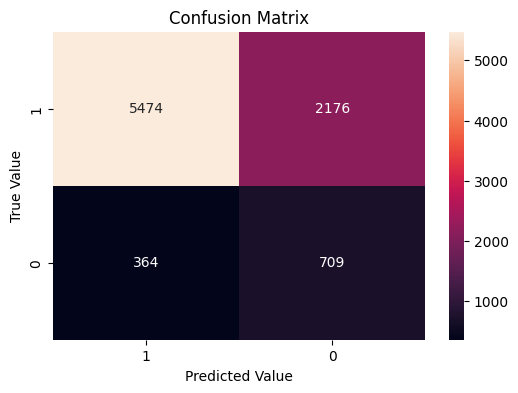

In [29]:
evaluate_model(model, X_test, y_test)

In [30]:
##not good for yes instances, NEXT DO UNDERSAMPLING AND SEE

### Kernelized SVC: Gaussian Radial Basis

In [31]:
import time
start_time = time.time()


kernel = "rbf"
sigma = "scale"
model = svm.SVC(kernel=kernel, gamma=sigma, class_weight='balanced').fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

1.941359519958496

Test Results
---------------------------------
Accuracy: 0.8107
Precision: 0.3448
Recall: 0.5983
F1-score: 0.4375
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                6430  1220
0                 431   642


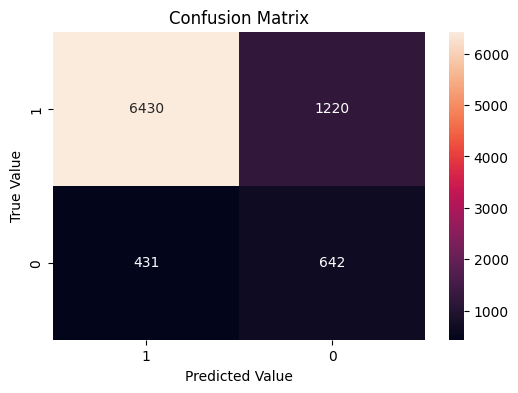

In [32]:
evaluate_model(model, X_test, y_test)

As we can see, neither the Linear or Kernelized SVC achieve a better `accuracy` than a dummy model always predicting "no", given we have 87% of "no", and only improves the overall `f1-score` by getting a small amount of "yes" right and maintaining 88% accuracy. Nonetheless, a 6% of recall on the "yes" is still very poor.

We decided to try undersampling the amount of "no" instances in our training set and retry our SVM trainings.

### Kernelized SVC: Gaussian Radial Basis with class weights

In [33]:
import time
start_time = time.time()


kernel = "rbf"
sigma = "scale"
model = svm.SVC(kernel=kernel, gamma=sigma,  class_weight= {0: 1, 1: 2}, C=0.1).fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

2.0762834548950195

Test Results
---------------------------------
Accuracy: 0.3710
Precision: 0.1539
Recall: 0.9143
F1-score: 0.2634
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                2255  5395
0                  92   981


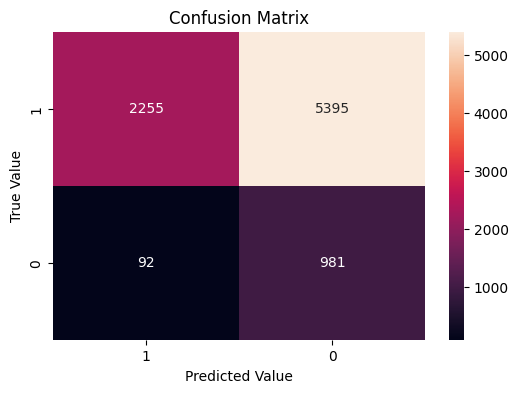

In [34]:
evaluate_model(model, X_test, y_test)

### Kernelized SVC with Sigmoid Kernel

In [35]:
import time
start_time = time.time()


kernel = "sigmoid"
sigma = "scale"
model = svm.SVC(kernel=kernel, gamma=sigma).fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

2.315375804901123

Test Results
---------------------------------
Accuracy: 0.5574
Precision: 0.1525
Recall: 0.5704
F1-score: 0.2407
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                4250  3400
0                 461   612


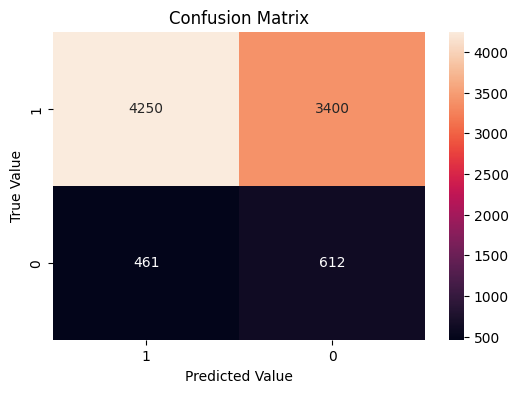

In [36]:
evaluate_model(model, X_test, y_test)

### Random Forest

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

Test Results
---------------------------------
Accuracy: 0.7848
Precision: 0.3174
Recall: 0.6514
F1-score: 0.4269
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                6147  1503
0                 374   699


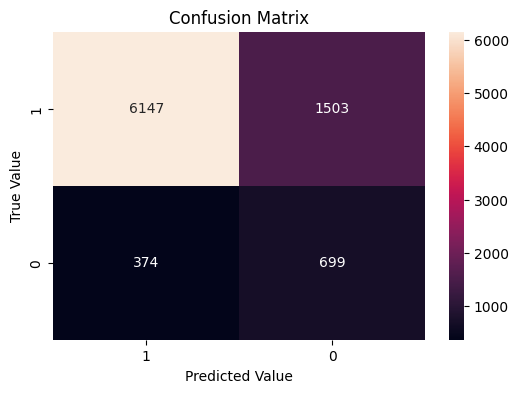

In [37]:
# Create a Random Forest model with specified parameters
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

evaluate_model(rf_model, X_test, y_test)

### Logistic Regression

LogisticRegression()

Test Results
---------------------------------
Accuracy: 0.7092
Precision: 0.2457
Recall: 0.6589
F1-score: 0.3579
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                5479  2171
0                 366   707


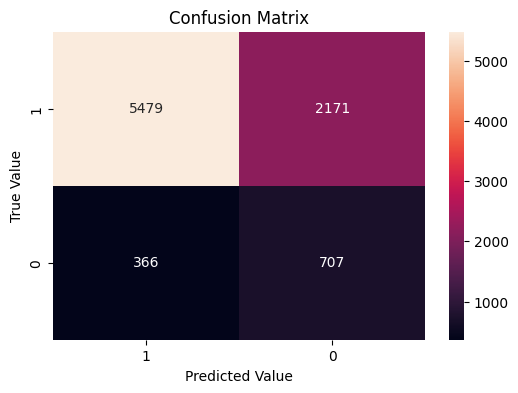

In [38]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(model, X_test, y_test)

### Gradient Boost

GradientBoostingClassifier(random_state=42)

Test Results
---------------------------------
Accuracy: 0.7909
Precision: 0.3267
Recall: 0.6598
F1-score: 0.4370
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                6191  1459
0                 365   708


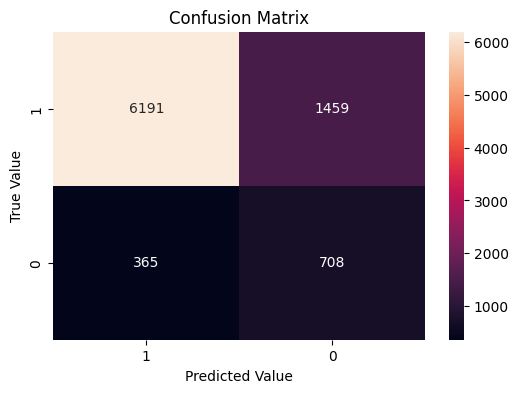

In [39]:
# Create a Gradient Boosting model with default parameters
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(gb_model, X_test, y_test)

### kNN

KNeighborsClassifier(n_neighbors=7)

Test Results
---------------------------------
Accuracy: 0.7331
Precision: 0.2550
Recall: 0.6086
F1-score: 0.3594
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                5742  1908
0                 420   653


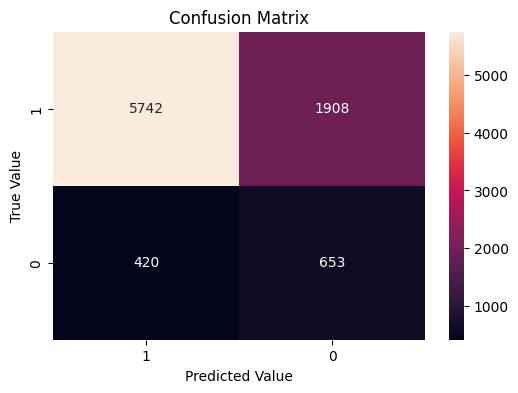

In [40]:
# Create a k-Nearest Neighbors model with k=7
knn_model = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(knn_model, X_test, y_test)

### Kernelized SVC with Polynomial Kernel

Pipeline(steps=[('svm_clf', SVC(C=5, coef0=1, degree=2, kernel='poly'))])

Test Results
---------------------------------
Accuracy: 0.8183
Precision: 0.3550
Recall: 0.5843
F1-score: 0.4417
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                6511  1139
0                 446   627


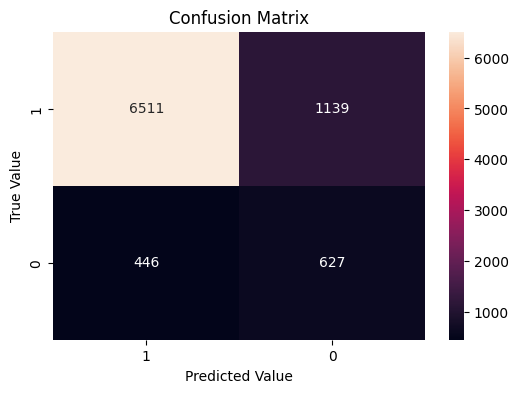

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
svm_clf = Pipeline([
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])

# Fit the pipeline on the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(svm_clf, X_test, y_test)

### Bayes Classifier

From theory, the best model for `binary classification` is the bayes classifier using the `0-1 loss` we will go into it step by step.

Pipeline(steps=[('classifier', GaussianNB())])

Test Results
---------------------------------
Accuracy: 0.8127
Precision: 0.3037
Recall: 0.4045
F1-score: 0.3469
---------------------------------
Confusion Matrix:
Predicted Value     1    0
True Value                
1                6655  995
0                 639  434


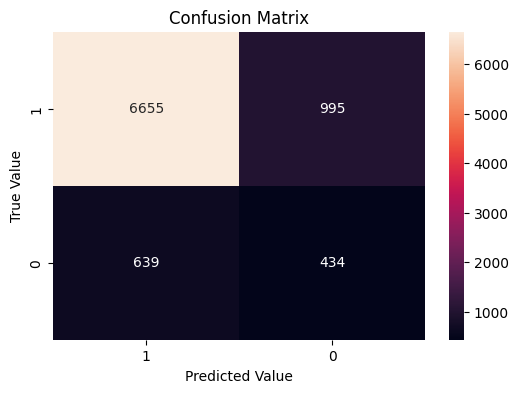

In [42]:
from sklearn.naive_bayes import GaussianNB
# Create a pipeline with the Gaussian Naive Bayes classifier
model = Pipeline(steps=[('classifier', GaussianNB())])

# Fit the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
evaluate_model(model, X_test, y_test)

### Kernelized PCA and Decision Boundaries

In [43]:
# Concatenate X_train and y_train along the second axis
tmp = np.column_stack((X_train, y_train))

In [44]:
from sklearn.decomposition import KernelPCA

# Apply kernelized PCA
kpca = KernelPCA(kernel='sigmoid', gamma=3, n_components=2)
X_kpca = kpca.fit_transform(X_train)
tmp = np.column_stack((X_kpca, y_train))
X_kpca.shape
# tmp.shape

(8276, 2)

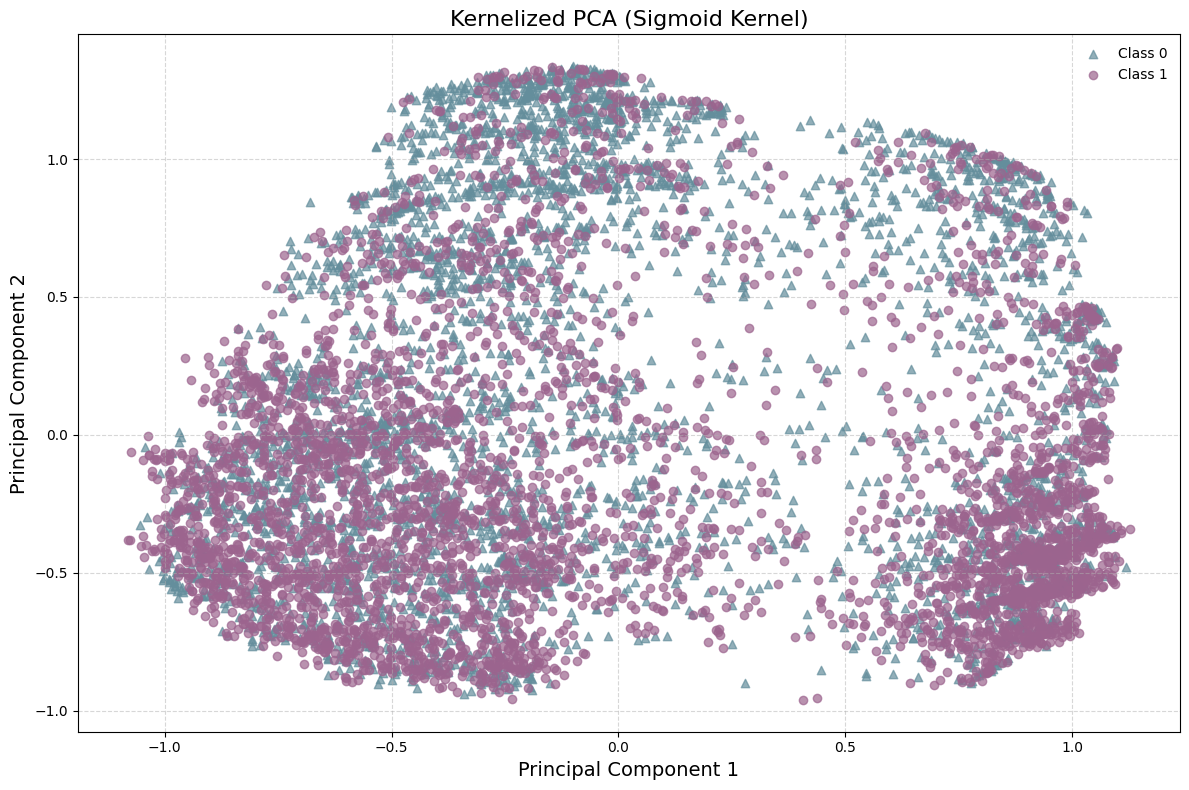

In [46]:
# Define colors
colors = ['#648E9C', '#9C648E']

# Plot the results
plt.figure(figsize=(12, 8))

# Scatter plot for Class 0
plt.scatter(X_kpca[tmp[:, 2] == 0, 0], X_kpca[tmp[:, 2] == 0, 1], color=colors[0], marker='^', alpha=0.7, label='Class 0')

# Scatter plot for Class 1
plt.scatter(X_kpca[tmp[:, 2] == 1, 0], X_kpca[tmp[:, 2] == 1, 1], color=colors[1], marker='o', alpha=0.7, label='Class 1')

# Style the plot
plt.title('Kernelized PCA (Sigmoid Kernel)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Customize the legend with specified colors
legend = plt.legend()
legend.legendHandles[0].set_color(colors[0])
legend.legendHandles[1].set_color(colors[1])

# Remove the border from the legend
legend.get_frame().set_linewidth(0.0)

# Show the plot
plt.show();

In [51]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(model, X, y):
    # Train the SVC
    clf = model

    # Settings for plotting
    _, ax = plt.subplots(figsize=(12, 8))
    x_min, x_max, y_min, y_max = -2, 2, -2, 2
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    # Add legend
    ax.legend()
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

In [49]:
start_time = time.time()

kernel = "sigmoid"
gamma = "scale"
C = 0.01
class_weight = 'balanced'
model_kenerlized_PCA = svm.SVC(kernel=kernel, gamma=gamma, C=C, class_weight=class_weight).fit(X_kpca, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

2.100506544113159

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


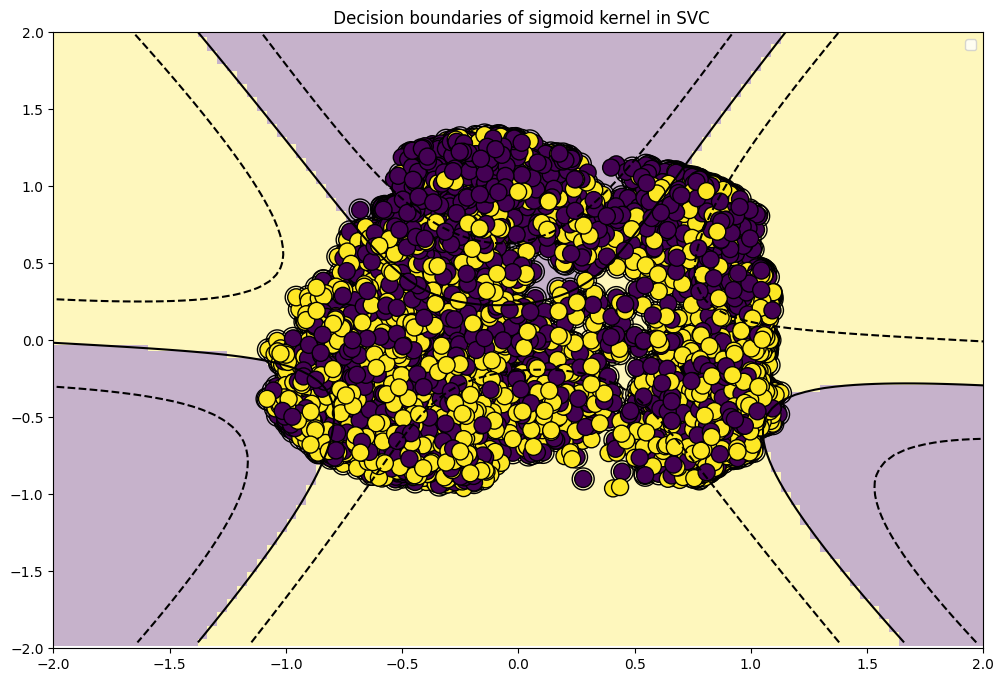

In [52]:
plot_training_data_with_decision_boundary(model_kenerlized_PCA, X_kpca, y_train)

We can see that the decision boundaries obtained with the sigmoid kernel appear curved and irregular. The decision boundary tries to separate the classes by fitting a sigmoid-shaped curve, resulting in a complex boundary that may not generalize well to unseen data. From this example it becomes obvious, that the sigmoid kernel has very specific use cases, when dealing with data that exhibits a sigmoidal shape. In this example, careful fine tuning might find more generalizable decision boundaries. Because of it’s specificity, the sigmoid kernel is less commonly used in practice compared to other kernels.

***
# SECTION 5: Grid-search comparing Machine Learning Algorithms, and finding best Hyperparameters

## Focused on Accuracy

In [118]:
# Define the models and their hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(solver='liblinear'), {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [5, 10], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
    'SVM_linear': (svm.LinearSVC(dual=False), {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
    'SVM_poly': (SVC(kernel='poly'), {'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
    'SVM_rbf': (SVC(kernel='rbf'), {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
    'SVM_sigmoid': (SVC(kernel='sigmoid'), {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001],}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Naive Bayes': (GaussianNB(), {}),
}

# Define a custom scoring function to calculate precision, recall, F1-score
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1_score': make_scorer(f1_score, pos_label=1)
}

# Perform cross-validation and hyperparameter tuning for each model
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the mean cross-validated scores for each metric
    cv_results = grid_search.cv_results_
    mean_scores = {
        'Accuracy': cv_results['mean_test_accuracy'][grid_search.best_index_],
        'Precision': cv_results['mean_test_precision'][grid_search.best_index_],
        'Recall': cv_results['mean_test_recall'][grid_search.best_index_],
        'F1-score': cv_results['mean_test_f1_score'][grid_search.best_index_]
    }
    
    results[model_name] = {
        'Best Hyperparameters': grid_search.best_params_,
        **mean_scores,
        'Validation Errors': cv_results['std_test_accuracy'][grid_search.best_index_]
    }

# Create a dataframe to store the results
df_results = pd.DataFrame(results).transpose()
df_results.index.name = 'Model'

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', {0: 1, 1: 2}],
                         'penalty': ['l1', 'l2']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 2}],
                         'max_depth': [5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=LinearSVC(dual=False),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', {0: 1, 1: 2}]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', {0: 1, 1: 2}],
                         'degree': [2, 3, 4]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', {0: 1, 1: 2}],
                         'gamma': ['scale', 'auto']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', {0: 1, 1: 2}],
                         'gamma': ['scale', 'auto']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid={}, refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1_score': make_scorer(f1_score, pos_label=1),
                      'precision': make_scorer(precision_score, pos_label=1),
                      'recall': make_scorer(recall_score, pos_label=1)})

In [119]:
df_results

Best Hyperparameters  \
Model                                                                    
Logistic Regression  {'C': 0.001, 'class_weight': 'balanced', 'pena...   
Random Forest        {'class_weight': 'balanced', 'max_depth': 10, ...   
SVM_linear                    {'C': 0.001, 'class_weight': 'balanced'}   
SVM_poly             {'C': 10, 'class_weight': 'balanced', 'degree'...   
SVM_rbf              {'C': 1, 'class_weight': 'balanced', 'gamma': ...   
SVM_sigmoid          {'C': 0.01, 'class_weight': 'balanced', 'gamma...   
Gradient Boosting          {'learning_rate': 0.1, 'n_estimators': 300}   
KNN                          {'n_neighbors': 7, 'weights': 'distance'}   
Naive Bayes                                                         {}   

                     Accuracy Precision    Recall  F1-score Validation Errors  
Model                                                                          
Logistic Regression   0.68318  0.684367  0.679796  0.682044          0.010587  
Random Forest        0.715562  0.746996  0.652008  0.696219          0.007639  
SVM_linear           0.681247  0.691204  0.655145  0.672645          0.007474  
SVM_poly             0.709883  0.776992  0.588687  0.669707          0.009717  
SVM_rbf              0.711937  0.771333  0.602706  0.676649          0.010213  
SVM_sigmoid          0.667835  0.645453  0.744802  0.691556          0.008585  
Gradient Boosting    0.720396  0.760285  0.643787  0.697184          0.003846  
KNN                  0.672788  0.687277  0.634366  0.659676           0.00515  
Naive Bayes          0.636056  0.760566  0.397294  0.521891           0.00693

In [120]:
df_results.to_csv("accuracy_results.csv", header=True, index=True)

From the results of the `Cross-Validation` procedure focused on `Accuracy`, it is concluded that the most appropriate models for the specific use-case seems to be `Gradient_Boosting`, `Random Forest`, `SVM_sigmoid`, and `SVM_rbf` which achieve the highest value of `F1-score`, `Accuracy` and `Precision`  respectively. However, it is really important, in this case, to achieve a high `Recall` value, since the model's goal is to classify unseen (future) positive outcomes of marketing campaign calls. More precisely, we are interested in optimizing the model to be able to classify which clients that will be contacted in the future is more likely to subscribe to the marketing offer. For that reason, the final selected model is considered to be `SVM_sigmoid` with parameters `{'C': 0.01, 'class_weight': 'balanced', 'gamma': 'scale'}`. This model achieves the highest overall mean `Recall` being equal to `0.744802`.

## Focused on Recall, with more weight on `yes`

In [121]:
# # Define the models and their hyperparameter grids
# models = {
#     'Logistic Regression': (LogisticRegression(solver='liblinear'), {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
#     'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [5, 10], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
#     'SVM_linear': (svm.LinearSVC(dual=False), {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
#     'SVM_poly': (SVC(kernel='poly'), {'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
#     'SVM_rbf': (SVC(kernel='rbf'), {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
#     'SVM_sigmoid': (SVC(kernel='sigmoid'), {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced', {0: 1, 1: 2}]}),
#     'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}),
#     'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
#     'Naive Bayes': (GaussianNB(), {}),
# }

# # Define a custom scoring function to calculate precision, recall, F1-score
# scoring = {
#     'accuracy': 'accuracy',
#     'precision': make_scorer(precision_score, pos_label=1),
#     'recall': make_scorer(recall_score, pos_label=1),
#     'f1_score': make_scorer(f1_score, pos_label=1)
# }

# # Perform cross-validation and hyperparameter tuning for each model
# results = {}
# for model_name, (model, param_grid) in models.items():
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='recall')
#     grid_search.fit(X_train, y_train)
    
#     # Get the mean cross-validated scores for each metric
#     cv_results = grid_search.cv_results_
#     mean_scores = {
#         'Accuracy': cv_results['mean_test_accuracy'][grid_search.best_index_],
#         'Precision': cv_results['mean_test_precision'][grid_search.best_index_],
#         'Recall': cv_results['mean_test_recall'][grid_search.best_index_],
#         'F1-score': cv_results['mean_test_f1_score'][grid_search.best_index_]
#     }
    
#     results[model_name] = {
#         'Best Hyperparameters': grid_search.best_params_,
#         **mean_scores,
#         'Validation Errors': cv_results['std_test_accuracy'][grid_search.best_index_]
#     }

# # Create a dataframe to store the results
# df_results = pd.DataFrame(results).transpose()
# df_results.index.name = 'Model'

In [122]:
# df_results

In [117]:
# df_results.to_csv("recall_results.csv", header=True, index=True)

***
# SECTION 6: Best Model

In [54]:
start_time = time.time()

kernel = "sigmoid"
gamma = "scale"
C = 0.01
class_weight = 'balanced'
best_model = svm.SVC(kernel=kernel, gamma=gamma, C=C, class_weight=class_weight).fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

2.6292786598205566

Test Results
---------------------------------
Accuracy: 0.6371
Precision: 0.2155
Recall: 0.7390
F1-score: 0.3338
---------------------------------
Confusion Matrix:
Predicted Value     1     0
True Value                 
1                4764  2886
0                 280   793


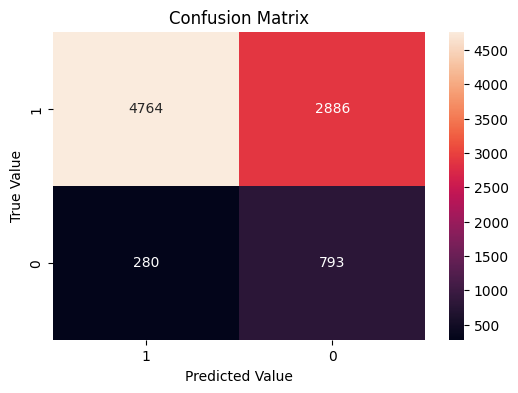

In [55]:
# Make predictions on the test set
evaluate_model(best_model, X_test, y_test)

## Bias-Variance Tradeoff

This concept is of great interest as it is correlated with the concept of overfitting and underfitting meaning that a model with high variance will have a low bias and this is that the model is overfitting the data used for train while on the other hand if a model has high bias and low variance then the model is underfitting. Also, remember that a model with high capacity (complexity) is more prone to overfit compared with those that have lower capacity.

Given a dataset $D = \{(\mathbf{x}_1,y_1), \dots, (\mathbf{x}_n, y_n)\}$ with $\mathbf{x}_i\in\mathbb{R}^d$ and $y_i\in \{'\text{yes}', '\text{no}'\}$ with $X = \begin{pmatrix} \rule[.5ex]{2em}{0.3pt} &  \mathbf{x}_1^T & \rule[.5ex]{2em}{0.3pt}\\ & \vdots & \\ \rule[.5ex]{2em}{0.3pt} & \mathbf{x}_n^T & \rule[.5ex]{2em}{0.3pt} \end{pmatrix}$ and $\mathbf{y} = \begin{pmatrix} y_1 \\ \vdots \\ y_n\end{pmatrix}$.

The bias and variance formula is: $$\mathbb{E}_{D,\epsilon}[(y - \hat{f}(x;D))^2] = \text{Bias}_D[\hat{f}(x;D)]^2 + \text{Var}_D[\hat{f}(x;D)]+\sigma^2$$

where:
$$\text{Bias}_D[\hat{f}(x;D)]=\mathbb{E}_D[\hat{f}(x;D)-f(x)]=\mathbb{E}_D[\hat{f}(x;D)]-\mathbb{E}_{y|x}[y(x)]$$
$$\text{Var}_D[\hat{f}(x;D)]=\mathbb{E}_D[(\mathbb{E}_D[\hat{f}(x;D)]-\hat{f}(x;D))^2]$$
$$\sigma^2=\mathbb{E}_y[(y-f(x))^2]$$

Bias is the difference between the average estimator from different training samples and the true value. The variance provides an estimate of how much the estimate varies as we vary the training data. $\sigma^2$ is the irreducible error.

### Training-Test Error Analysis on the model's Hyper-parameters

In [72]:
# Generate values for gamma
gamma_values = ['scale', 'auto']

# Generate values for C
C_values = np.linspace(0.00001, 100, num=50, dtype=int)

# Generate values for class_weight
class_weight_values = ['balanced', {0: 1, 1: 2}]

In [86]:
def plot_errors_based_on_hyperparameter_sigmoid_SVM(X_train, y_train, X_test, y_test, parameter_name, parameter_space):    
    
    colors = ['#648E9C', '#9C648E']
    
    # Initialize lists to store training and test errors
    train_errors = []
    test_errors = []

    # Fit the model and calculate errors for different max_depth values
    for parameter in parameter_space:
        if parameter_name =='C':
            # Create and fit the Random Forest model with the current max_depth value
            model = svm.SVC(kernel='sigmoid', gamma='scale', C=parameter, class_weight='balanced').fit(X_train, y_train)
        elif parameter_name =='gamma':
            model = svm.SVC(kernel='sigmoid', gamma=gamma, C=0.01, class_weight='balanced').fit(X_train, y_train)
        elif parameter_name =='class_weight':
            model = svm.SVC(kernel='sigmoid', gamma='scale', C=0.01, class_weight=class_weight).fit(X_train, y_train)
        model.fit(X_train, y_train);
        
        # Calculate training error
        train_pred = model.predict(X_train)
        train_error = zero_one_loss(y_train, train_pred)
        train_errors.append(train_error)
        
        # Calculate test error
        test_pred = model.predict(X_test)
        test_error = zero_one_loss(y_test, test_pred)
        test_errors.append(test_error)

    # Plot the training and test errors
    plt.figure(figsize=(10, 6))
    if parameter_name == 'class_weight': parameter_space = ['balanced', 'double-weight-for-yes']
    if parameter_name == 'C': 
        train_errors = np.log(train_errors)
        test_errors = np.log(test_errors)
    plt.plot(parameter_space, train_errors, marker='o', color=colors[0], label='Training Error')
    plt.plot(parameter_space, test_errors, marker='o', color=colors[1], label='Test Error')
    plt.xlabel(f'{parameter_name}')
    plt.ylabel('Error')
    plt.title(f'Training and Test Error Analysis for Different {parameter_name}')
    plt.legend()
    plt.show();

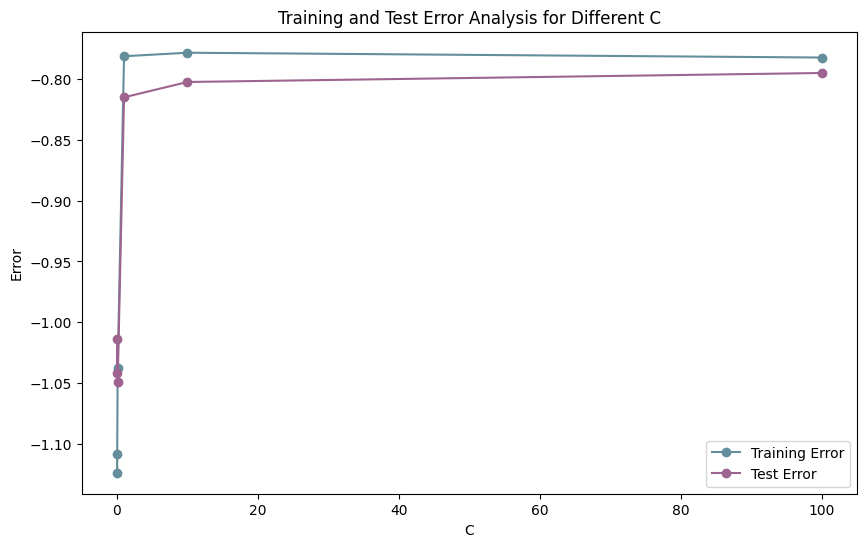

In [87]:
plot_errors_based_on_hyperparameter_sigmoid_SVM(X_train, y_train, X_test, y_test, 'C', C_values)

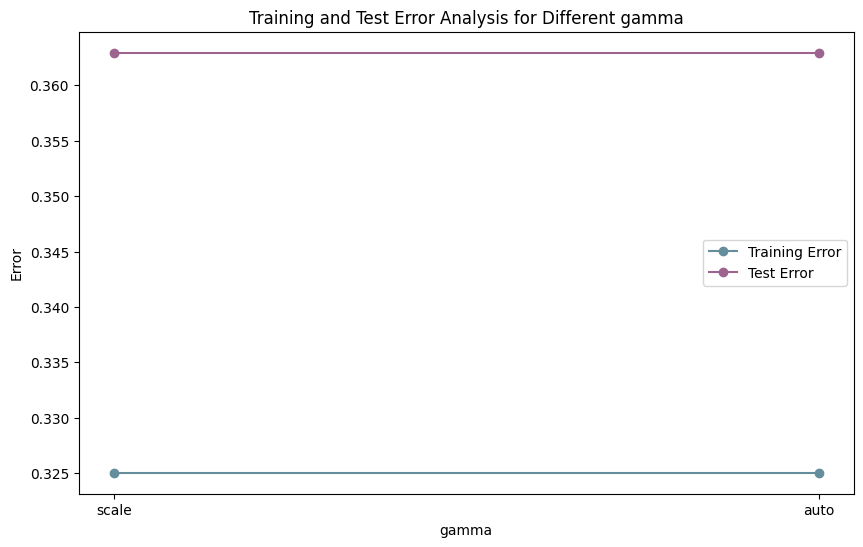

In [78]:
plot_errors_based_on_hyperparameter_sigmoid_SVM(X_train, y_train, X_test, y_test, 'gamma', gamma_values)

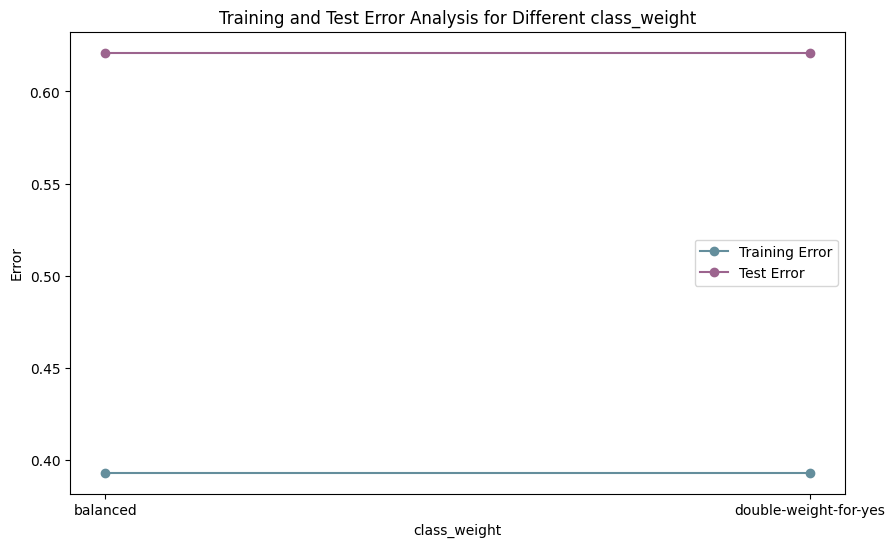

In [85]:
plot_errors_based_on_hyperparameter_sigmoid_SVM(X_train, y_train, X_test, y_test, 'class_weight', class_weight_values)

### Training-Test Error Analysis on the Training Data Size

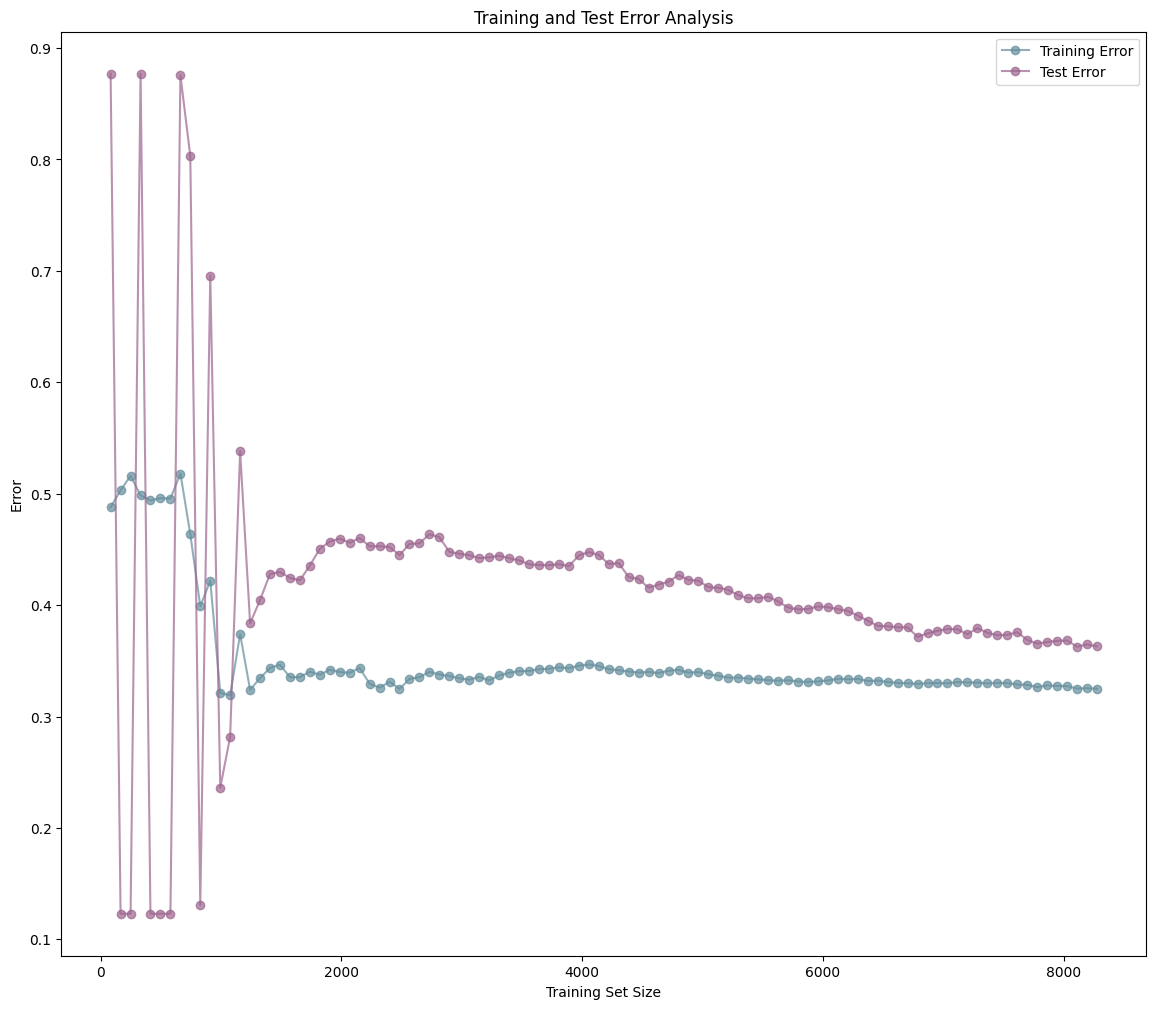

In [89]:
kernel = "sigmoid"
gamma = "scale"
C = 0.01
class_weight = 'balanced'
model = svm.SVC(kernel=kernel, gamma=gamma, C=C, class_weight=class_weight)

# Initialize lists to store training and test errors
train_errors = []
test_errors = []
train_sizes = []

# Vary the size of the training set
for i in range(1, 101, 1):
    train_size = int((i / 100) * len(X_train))
    train_sizes.append(train_size)
    
    # Fit the model on the current training set size
    model.fit(X_train[:train_size], y_train[:train_size])
    
    # Calculate training error
    train_pred = model.predict(X_train[:train_size])
    train_error = zero_one_loss(y_train[:train_size], train_pred)
    train_errors.append(train_error)
    
    # Calculate test error
    test_pred = model.predict(X_test)
    test_error = zero_one_loss(y_test, test_pred)
    test_errors.append(test_error)

# Plot the training and test errors
plt.figure(figsize=(14, 12))
plt.plot(train_sizes, train_errors, marker='o', alpha=0.7, color=colors[0], label='Training Error')
plt.plot(train_sizes, test_errors, marker='o', alpha=0.7, color=colors[1], label='Test Error')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Training and Test Error Analysis')
plt.legend()
plt.show();

From this plot, one can understand that as the `Training Set Size` which is fed into the model increases, the `training misslcassification error` decreases but very slightly, since the worst error achieved is approx. **0.32**. As for the `test misslcassification error`, it is clear that in fluctuates between the values **0.03** and **0.88** when the training sample is kept at small numbers (**0** to **1600**), althouh for higher numbers both errors tend to stabilise. The slopes of the figure suggest that by increasing the total size of the dataset, would lead the two curves to come closer and closer, meaning that the model would be able to generalize pretty-well.

## Feature Importance

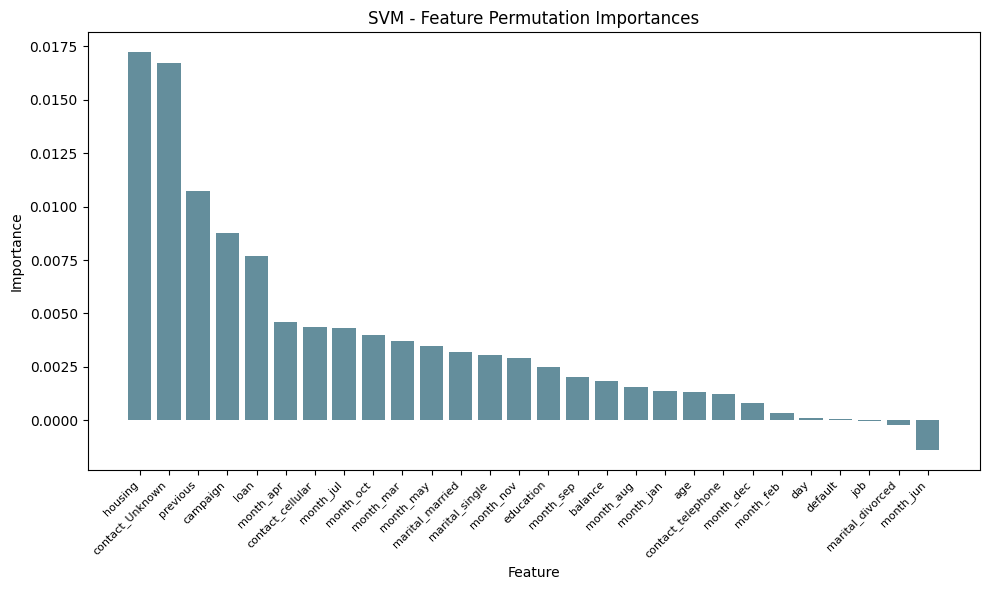

In [90]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)
importance = result.importances_mean
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_feature_importances = importance[sorted_indices]

# Get the names of the features
feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), sorted_feature_importances, color='#648E9C')
plt.xticks(range(len(importance)), feature_names, rotation=45, ha='right', fontsize=8)
plt.title('SVM - Feature Permutation Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show();

## Saving final model

In [92]:
# Save the best_rf_model to a file
import pickle
with open("final_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

In [93]:
best_model

SVC(C=0.01, class_weight='balanced', kernel='sigmoid')